# Tutorial 3.Principal component analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE)


Created by Emanuel Flores-Bautista 2018.  All code contained in this notebook is licensed under the [Creative Commons License 4.0](https://creativecommons.org/licenses/by/4.0/).

Data scientists are commonly faced with the problem of finding relationships of high-dimensional data, without previous knowledge. These set of problems can be solved with methods of the so called unsupervised machine learning. To get a sense of this problem, let's watch this video from Google Researchers.

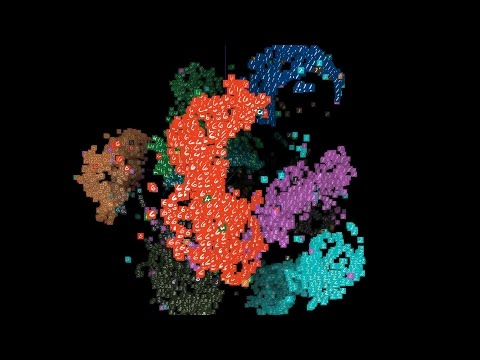

In [86]:
from IPython.display import YouTubeVideo
YouTubeVideo('wvsE8jm1GzE')

Dimension reduction is the process by which of embedding high dimensional data into a lower dimension space where each dimension is formed by a combination of the original dimensions. Principal component analysis (PCA) is a linear transformation such that the variance between points is maximized. Let's make use of PCA on Python.

In [87]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import seaborn as sns
import sklearn.datasets
import sklearn.decomposition

In [88]:
#Setting all the plots in the notebook
%matplotlib inline

#Make the figure format appear as svg
%config InlineBackend.figure_format = 'svg' 

### We will be using the famous Iris dataset.

In [89]:
#Import the iris dataset from scikit 

iris= sklearn.datasets.load_iris()

We can see the story behind this data set [here](https://en.wikipedia.org/wiki/Iris_flower_data_set), or we can use the `.DESCR` attribute.

In [90]:
#Print Iris dataset description 
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

As you can see, this is a data set of quantitative data about three different species of the *Iris* genus flowers made by the famous statician Ronald Fisher.

In [91]:
from IPython.display import Image

Image(url= "https://upload.wikimedia.org/wikipedia/commons/a/ad/Iris_persica_%28Sowerby%29.jpg")

In [92]:
type(iris)

sklearn.utils.Bunch

Let's transform this `Bunch`object to a data frame.

In [93]:
df_iris= pd.DataFrame(iris.data, columns= iris.feature_names)


df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [94]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Now let's add the species data to visualize our data set.  

In [95]:
df_iris['species']= iris.target_names[iris.target]

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's do some EDA using seaborn's `pairplot()` function to make paiwise comparisons b/w our variables.

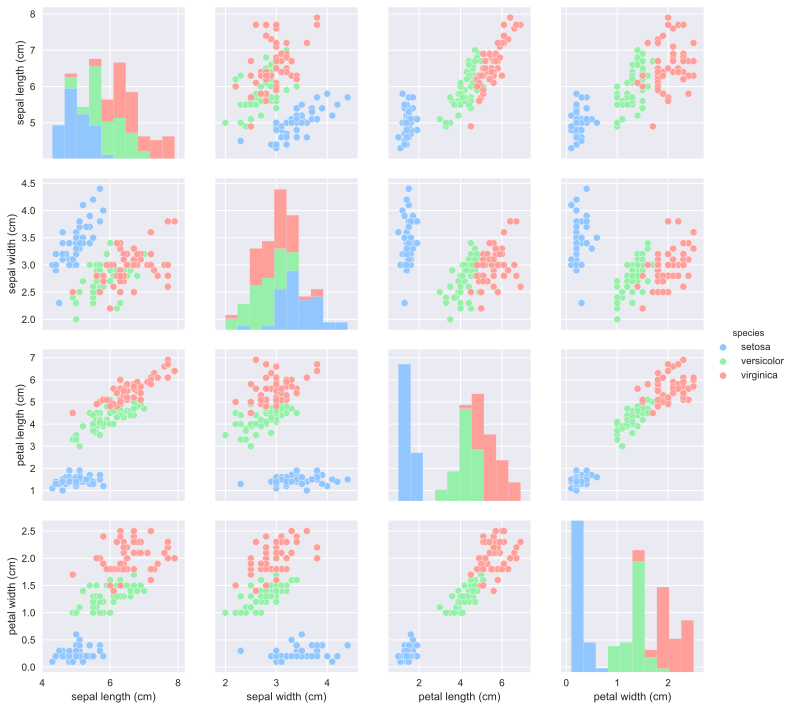

In [96]:
_= sns.pairplot(df_iris, hue= 'species', palette= 'pastel')

We can see that across different variables, the versicolor and virginica species cluster together.

Let's make another visualization.

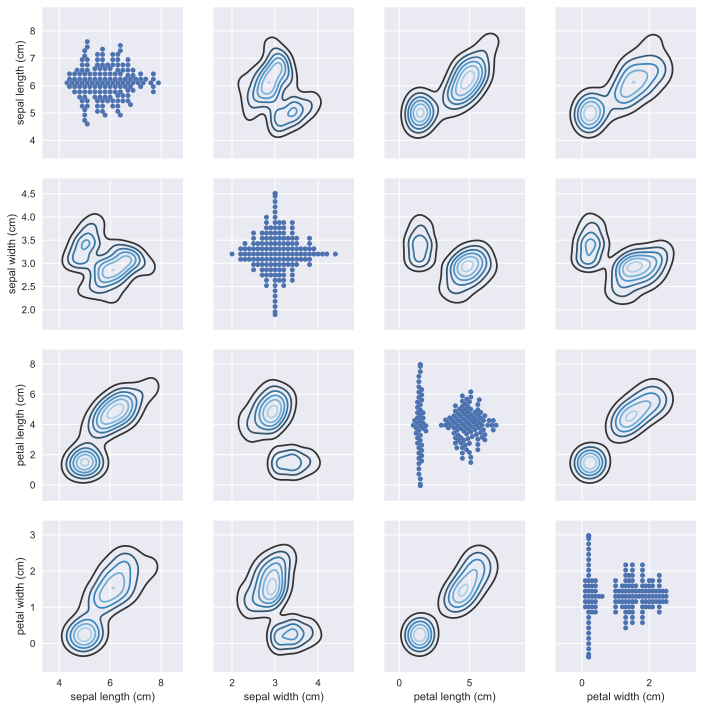

In [97]:
g = sns.PairGrid(df_iris)
g.map_diag(sns.swarmplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6, hue= 'species')

We can see that there are clearly two clusters. 

### We can do the *manual* PCA anytime we want, but for now we'll use Scikit-learn 

Scikit uses Python object orientation: 

We first instatiate a `sklearn.decomposition.PCA` object and then use the `.fit()` method to get the PCA on our data. Finally we will transform the our data to a PCA object, and then to a data frame. The attributes of the PCA instance are the computed values. 


In [98]:
#Calculate the PCs using scikit-learn
pca= sklearn.decomposition.PCA()
pca.fit(df_iris[iris.feature_names])
print('Variance percent explained\n', pca.explained_variance_ratio_)

Variance percent explained
 [ 0.92461621  0.05301557  0.01718514  0.00518309]


We can see that the highest variance goes to the first PCs. Each PC is a linear combination of the original variables. 

Before we transform our data, let's select(like list slicing) only the numerical variables using the `iloc` method. 

In [99]:
df_iris.iloc[:,:4].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We're ready to transform our data using PCA and work with only two components.

In [100]:
pca = sklearn.decomposition.PCA(n_components= 2)
pca.fit=(df_iris.iloc[:,:4])
pca_2d = pca.fit_transform(df_iris.iloc[:,:4])

Now let's convert the PCA object to a data frame. 

In [101]:
df_2D= pd.DataFrame(pca_2d,
                   columns=['PC1', 'PC2'])

##Re-adding the species column to plot using labels. 
df_2D['species'] = df_iris['species']
df_2D.head()

,PC1,PC2,species
0,-2.684207,0.326607,setosa
1,-2.715391,-0.169557,setosa
2,-2.889820,-0.137346,setosa
3,-2.746437,-0.311124,setosa
4,-2.728593,0.333925,setosa


Now let's visualize our transformed data on the first two PCs.

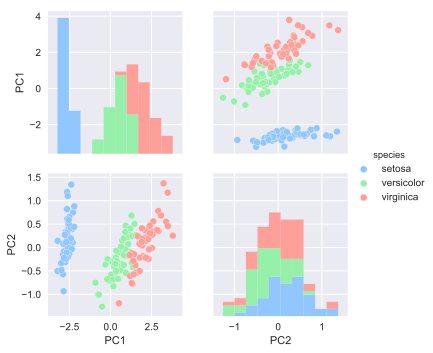

In [102]:
_= sns.pairplot(df_2D, hue= 'species', palette= 'pastel')

##### Caveat for using PCA.

For this data set PCA worked nicely, i.e. we can see a clear difference between the different flower species. Moreover, note that the relationship of the versicolor species clustering together with the virginica mantains. PCA is a powerful method, but it may not work with other high dimensional data sets.

## Finding the perfect human with PCA

This part of the tutorial was based on a [blog post](https://liorpachter.wordpress.com/tag/principal-component-analysis/) by Prof. Lior Pachter. 

In brief: 

SNPedia is a database for human SNPs classified as good or bad. 

"The perfect human" label was generated by setting all the alleles to "good", he then added the perfect human to a panel of genotyped individuals from across a variety of populations and performed PCA to reveal the location and population of origin of the individual to this hypothetical perfect human..."

In [103]:
##Load in the data, in a tidy format

df_snp = pd.read_csv('Downloads/Pachter/geno_table.txt', delimiter= '\t', index_col= 'snp_id').transpose()

df_snp.head()

snp_id,rs307377,rs7366653,rs41307846,rs3753242,rs35082957,rs34154371,rs35426403,rs1143016,rs3890745,rs17472401,...,rs6007897,rs9615362,rs9627183,rs28372448,rs121913039,rs121913037,rs5770917,rs6151429,rs743616,rs2071421
perfect,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
HG00096,2,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
HG00097,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
HG00099,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
HG00100,2,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [104]:
df_snp.shape 

(1093, 4967)

We can see that this is a high dimensional data set of 4967 variables (SNPs).Because we will do PCA on this data, we should turn the integers to floating points inside the data frame.

In [105]:
df_snp= df_snp.astype(np.float)

We also have the info for each individual, in the *.panel file 

In [106]:
fname = 'Downloads/Pachter/integrated_call_samples_v3.20130502.ALL.panel'

df_info = pd.read_csv(fname, delimiter= '\t', index_col=0).dropna(axis= 1, how = 'all')

df_info.head()

,pop,super_pop,gender
sample,,,
HG00096,GBR,EUR,male
HG00097,GBR,EUR,female
HG00099,GBR,EUR,female
HG00100,GBR,EUR,female
HG00101,GBR,EUR,male


For convenience we will merge the two dataframes.

In [107]:
##Add to the SNP df, the info about gender and population

aux_cols = ['pop', 'super_pop', 'gender']

df_snp[aux_cols] = df_info

Let's add a row corresponding to the perfect human.

In [108]:
#Assign the super_pop and pop column to 'perfect human being'
df_snp.loc['perfect', ['pop', 'super_pop']] = ['Perfect Human']*2

##Take a look at aux cols

df_snp[aux_cols].head()

snp_id,pop,super_pop,gender
perfect,Perfect Human,Perfect Human,NaN
HG00096,GBR,EUR,male
HG00097,GBR,EUR,female
HG00099,GBR,EUR,female
HG00100,GBR,EUR,female


#### Normalize the data using Standard Scaler

PCA is not scale invariant i.e. If your dataset contains thigs measured in nanometers and things measured in meters, or things measuring completely unrelated things, the units would affect the PCA analysis. 

The simplest way to avoid this is to form a "common set of units" by stardadizing or normalizing your data.  

In [109]:
df_snp.describe()

snp_id,rs307377,rs7366653,rs41307846,rs3753242,rs35082957,rs34154371,rs35426403,rs1143016,rs3890745,rs17472401,...,rs6007897,rs9615362,rs9627183,rs28372448,rs121913039,rs121913037,rs5770917,rs6151429,rs743616,rs2071421
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,...,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.0,1093.000000,1093.000000,1093.000000,1093.000000
mean,1.917658,0.040256,0.019213,0.408966,0.007319,0.019213,0.011894,0.049405,0.863678,0.023788,...,0.445563,0.421775,0.107045,0.163769,0.000915,0.0,0.229643,0.079597,0.850869,0.419945
std,0.291185,0.226917,0.137336,0.660359,0.085278,0.137336,0.108458,0.229133,0.715276,0.158350,...,0.673960,0.693086,0.318070,0.398814,0.030248,0.0,0.475941,0.277474,0.702358,0.599332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,0.0,2.000000,2.000000,2.000000,2.000000


Using a standard scaler, we set each column to a uniform gaussian distribution with $\mu$ = 0 and $\sigma$  = 1. Before 

In [110]:
# Normalize data, use the.drop() method to remove the categorical variables. 
df_snp_std = sklearn.preprocessing.StandardScaler().fit_transform(
    df_snp.drop(aux_cols, axis = 1))


In [111]:
#Perform the PCA and transform the data

n_components = 5

snp_pca = sklearn.decomposition.PCA(n_components= n_components)## initialize the PCA obj.


In [112]:
#Fit/transform

snp_pca.fit(df_snp_std)

df_snp_pca = snp_pca.transform(df_snp_std)

In [113]:
#Convert back to a nice, tidy dataframe

df_snp_pca = pd.DataFrame(df_snp_pca, 
                         columns= ['PC' +  str(x) for x in range(1, n_components+1)],
                         index= df_snp.index)

#Add again the metadata (gender, pop, and super_pop columns)

df_snp_pca[aux_cols] = df_snp[aux_cols]

df_snp_pca.head()

,PC1,PC2,PC3,PC4,PC5,pop,super_pop,gender
perfect,-2.221873,-13.823952,193.949786,26.728215,-2.306218,Perfect Human,Perfect Human,NaN
HG00096,-6.037516,-15.947683,0.536998,-3.399815,-3.554937,GBR,EUR,male
HG00097,-6.310191,-14.804931,1.029385,-13.745347,4.540334,GBR,EUR,female
HG00099,-7.102287,-15.820245,4.378802,-4.122949,-3.095256,GBR,EUR,female
HG00100,-6.006800,-17.297061,0.386522,-4.460008,-2.663161,GBR,EUR,female


Let's plot the first two components and find out who the perfect human being $is$ ! First let's import some amazing interactive visualization modules.

Loading BokehJS ...


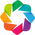

In [114]:
import holoviews as hv
import bebi103
import bokeh.io
import bokeh.plotting
# Set up Bokeh for inline viewing
bokeh.io.output_notebook()
hv.extension('bokeh')

In [115]:
%%opts Scatter [show_grid=True, width=500, height=420, tools=['hover']] (size=5)


scatter = hv.Scatter(df_snp_pca,
                     kdims=['PC1'], 
                     vdims=['PC2', 'pop', 'super_pop', 'gender'])

# Make groupby object
gb = scatter.groupby('super_pop')

# Make the overlay method
overlay = gb.overlay()

# Display
overlay

:NdOverlay   [super_pop]
   :Scatter   [PC1]   (PC2,pop,super_pop,gender)

We can see that the super pops cluster together. 

By zooming in to the perfect human, the nearest neighbors are two Puerto Rican women and one man! After Lior published these results, the media immediately blew it out of proportion (and context). 

In [116]:
from IPython.display import HTML 

HTML('<iframe src=https://www.huffingtonpost.com/julio-pabon/the-closet-perfect-human-_b_6304366.html width=700 height=350></iframe>')

When we plot other PCs we can see that this transformation of data is not so reliable among higher dimensional datasets, and that the perfect human is really an outlier. 

In [117]:
%%opts Scatter [show_grid=True, width=500, height=450, tools=['hover']] (size=5)


scatter = hv.Scatter(df_snp_pca,
                     kdims=['PC1'], 
                     vdims=['PC3', 'pop', 'super_pop', 'gender'])

# Make groupby object
gb = scatter.groupby('super_pop')

# Make the overlay method
overlay = gb.overlay()

# Display
overlay

:NdOverlay   [super_pop]
   :Scatter   [PC1]   (PC3,pop,super_pop,gender)

We can visualize this *outlier-ness* by plotting the first three PCs together. 

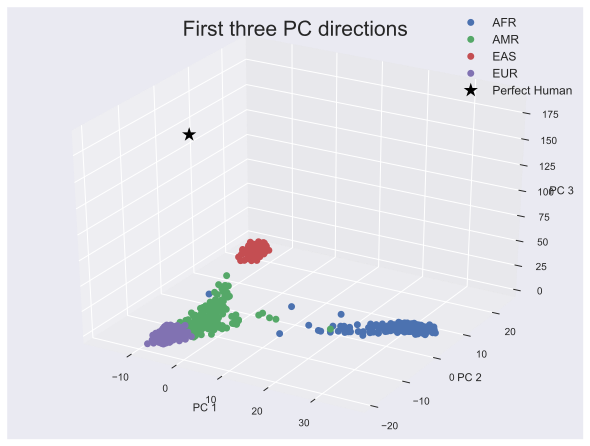

In [118]:
fig = plt.figure(1, figsize=(8, 6))
ax = mpl_toolkits.mplot3d.Axes3D(fig)
for key, group in df_snp_pca.groupby(['super_pop']):
    if key == 'Perfect Human':
        ax.plot(group.PC1, group.PC2, group.PC3, 'k*', markersize=15,
                label=key)
    else:
        ax.plot(group.PC1, group.PC2, group.PC3, 'o', alpha=0.05, label=key)

ax.set_title("First three PC directions", fontsize = 21)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.legend(loc='best', fontsize=12);

In Lior's words: 

> Here the “perfect human” is revealed to be decidedly non-human. This is not surprising, and it reflects the fact that the alleles of the “perfect human” place it as significant outlier to the human population. In fact, this is even more evident in the case of the “worst human”, namely the individual that has the “bad” alleles at every SNPs. A projection of that individual onto any combination of principal components shows them to be far removed from any actual human. The best visualization appears in the projection onto the 2nd and 3rd principal components, where they appear as a clear outlier (point labeled DYS), and diametrically opposite to Africans:



### Applying t-SNE to SNP data.

t-SNE is a non-linear dimension reduction method, that is more powerful than PCA for some applications. It is also a good technique to visualize high dimensional data. Let's apply t-SNE on the SNP data and visualize it. 

To get a sense of the way t-SNE works, watch [this amazing talk](https://youtu.be/aStvaXMhGGs) by Gal Yona at Tel Aviv PyData 2017.

In [119]:
from sklearn.manifold import TSNE as tsne

In [120]:
?sklearn.manifold.TSNE

In [121]:
#Make the object

t_sne = tsne(n_components= 3, init= 'pca', random_state= 42, learning_rate = 40)

#Transform the SNP data to t-SNE form
t_snp= t_sne.fit_transform(df_snp_std)


In [122]:
# Convert to DataFrame
df_tsne_SNP = pd.DataFrame(t_snp, 
                         columns= ['t-SNE' +  str(x) for x in range(1, 4)],
                         index= df_snp.index)

In [123]:
df_tsne_SNP['super_pop'] = df_snp_pca['super_pop']

In [124]:
df_tsne_SNP['pop'] = df_snp_pca['pop']

In [125]:
df_tsne_SNP['gender'] = df_snp_pca['gender']

In [126]:
%%opts Scatter [show_grid=True, width=500, height=450, tools=['hover']] (size=5)


scatter = hv.Scatter(df_tsne_SNP,
                     kdims=['t-SNE1'], 
                     vdims=['t-SNE2', 'pop', 'super_pop', 'gender'])

# Make groupby object
gb = scatter.groupby('super_pop')

# Make the overlay method
overlay = gb.overlay()

# Display
overlay

:NdOverlay   [super_pop]
   :Scatter   [t-SNE1]   (t-SNE2,pop,super_pop,gender)

We can see that in this case, t-SNE doesn't work as good as PCA. However other times is exactly the opposite.

In [127]:
?sklearn.manifold.TSNE

We can try to tweak the learning rate. 

In [128]:
t_sne = tsne(n_components= 3, init= 'pca', random_state= 42, learning_rate = 40)

In [129]:
t_snp= t_sne.fit_transform(df_snp_std)

df_tsne_SNP = pd.DataFrame(t_snp, 
                         columns= ['t-SNE' +  str(x) for x in range(1, 4)],
                         index= df_snp.index)

df_tsne_SNP['super_pop'] = df_snp_pca['super_pop']
df_tsne_SNP['pop'] = df_snp_pca['pop']
df_tsne_SNP['gender'] = df_snp_pca['gender']

In [130]:
%%opts Scatter [show_grid=True, width=500, height=450, tools=['hover']] (size=5)


scatter = hv.Scatter(df_tsne_SNP,
                     kdims=['t-SNE1'], 
                     vdims=['t-SNE2', 'pop', 'super_pop', 'gender'])

# Make groupby object
gb = scatter.groupby('super_pop')

# Make the overlay method
overlay = gb.overlay()

# Display
overlay

:NdOverlay   [super_pop]
   :Scatter   [t-SNE1]   (t-SNE2,pop,super_pop,gender)

We can see that the data is a bit more sparse, but it's still a bit too ball-like. 

### Conclusions

Dimensionality reduction works for some things, for others... not so well. In general, I wouldn't recommend to make any strong conclusions from dimensionality reduction visualizations, unless you have a lot of certainty about the data, and can afford to do so. However, I would strongly suggest to do dimensionality reduction to *massage* your data prior to making some other machine learning method, such as clustering, classification or regression.